In [9]:
import json
import glob
import numpy as np
import cv2

# Change the path accordingly (Use raw string or double backslashes)
video_files = glob.glob(r"C:\Users\harsh\Deepfake_detection_using_deep_learning\Dataset\*.mp4")

frame_count = []
for video_file in video_files:
    cap = cv2.VideoCapture(video_file)
    frame_count_value = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    if frame_count_value < 100:
        continue  # Don't remove from list while iterating
    
    frame_count.append(frame_count_value)
    cap.release()  # Release the video capture object

print("Frames:", frame_count)
print("Total number of videos:", len(frame_count))
print("Average frames per video:", np.mean(frame_count) if frame_count else 0)


Frames: [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148]
Total number of videos: 102
Average frames per video: 148.0


In [11]:
import os
import glob
import torch
import numpy as np
import cv2
import face_recognition
import torchvision.transforms as transforms
from tqdm import tqdm

# Function to extract frames
def frame_extract(path):
    vidObj = cv2.VideoCapture(path) 
    while True:
        success, image = vidObj.read()
        if not success:
            break
        yield image
    vidObj.release()  # Release the video capture object

# Ensure output directory exists
output_dir = r"C:\Users\harsh\Deepfake_detection_using_deep_learning\Face_only_data"
os.makedirs(output_dir, exist_ok=True)

# Function to process frames and extract faces
def create_face_videos(path_list, out_dir):
    already_present_count = len(glob.glob(os.path.join(out_dir, '*.mp4')))
    print("No of videos already present:", already_present_count)

    for path in tqdm(path_list):
        out_path = os.path.join(out_dir, os.path.basename(path))

        if os.path.exists(out_path):
            print(f"File Already Exists: {out_path}")
            continue

        frames = []
        out = cv2.VideoWriter(out_path, cv2.VideoWriter_fourcc(*'MJPG'), 30, (112, 112))

        for idx, frame in enumerate(frame_extract(path)):
            if idx > 100:
                break

            frames.append(frame)

            if len(frames) == 4:
                faces = face_recognition.batch_face_locations(frames)

                for i, face in enumerate(faces):
                    if face:  # Ensure at least one face is detected
                        top, right, bottom, left = face[0]
                        try:
                            cropped_face = cv2.resize(frames[i][top:bottom, left:right, :], (112, 112))
                            out.write(cropped_face)
                        except Exception as e:
                            print("Error processing face:", e)

                frames = []

        out.release()


In [ ]:
base_dir = "C:\\Users\\harsh\\Deepfake_detection_using_deep_learning"
output_dir = os.path.join(base_dir, "Face_only_data")
create_face_videos(video_files, output_dir)


In [16]:
!pip3 install face_recognition

In [19]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path) 
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil = glob.glob(r"C:\Users\harsh\Deepfake_detection_using_deep_learning\Face_only_data\*.mp4")
print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

Total no of videos : 102
['C:\\Users\\harsh\\Deepfake_detection_using_deep_learning\\Face_only_data\\000_003.mp4', 'C:\\Users\\harsh\\Deepfake_detection_using_deep_learning\\Face_only_data\\001.mp4', 'C:\\Users\\harsh\\Deepfake_detection_using_deep_learning\\Face_only_data\\001_870.mp4', 'C:\\Users\\harsh\\Deepfake_detection_using_deep_learning\\Face_only_data\\002.mp4', 'C:\\Users\\harsh\\Deepfake_detection_using_deep_learning\\Face_only_data\\002_006.mp4', 'C:\\Users\\harsh\\Deepfake_detection_using_deep_learning\\Face_only_data\\003.mp4', 'C:\\Users\\harsh\\Deepfake_detection_using_deep_learning\\Face_only_data\\003_000.mp4', 'C:\\Users\\harsh\\Deepfake_detection_using_deep_learning\\Face_only_data\\004.mp4', 'C:\\Users\\harsh\\Deepfake_detection_using_deep_learning\\Face_only_data\\004_982.mp4', 'C:\\Users\\harsh\\Deepfake_detection_using_deep_learning\\Face_only_data\\005.mp4', 'C:\\Users\\harsh\\Deepfake_detection_using_deep_learning\\Face_only_data\\005_010.mp4', 'C:\\Users\\har

In [21]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob(r"C:\Users\harsh\Deepfake_detection_using_deep_learning\Face_only_data\*.mp4")
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<50):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))
     

frames are  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 96, 100, 100, 100, 100, 96, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Total no of video:  102
Average frame per video: 99.8921568627451


In [29]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
def number_of_real_and_fake_videos(data_list):
    header_list = ["file", "label"]
    lab = pd.read_csv(r"C:\Users\harsh\Deepfake_detection_using_deep_learning\Face_only_data\metadata.csv", names=header_list)

    fake, real = 0, 0
    for i in data_list:
        temp_video = os.path.basename(i)  # Ensures correct filename extraction
        print(f"Checking: {temp_video}")  # Debugging output

        matching_rows = lab.loc[lab["file"] == temp_video]

        if matching_rows.empty:
            print(f"Warning: No label found for {temp_video}")  # Debugging output
            continue  # Skip this file

        label = matching_rows.iloc[0, 1]  # Safe indexing

        if label == 'FAKE':
            fake += 1
        elif label == 'REAL':
            real += 1

    return real, fake


In [35]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv(r"C:\Users\harsh\Deepfake_detection_using_deep_learning\Face_only_data\metadata.csv",names=header_list)
#print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

train :  81
test :  21
Checking: 041.mp4
Checking: 022_489.mp4
Checking: 005_010.mp4
Checking: 030.mp4
Checking: 035_036.mp4
Checking: a.mp4
Checking: 034.mp4
Checking: 002.mp4
Checking: 022.mp4
Checking: 048_029.mp4
Checking: 039.mp4
Checking: 036.mp4
Checking: 014_790.mp4
Checking: 020.mp4
Checking: 044_945.mp4
Checking: 036_035.mp4
Checking: 021_312.mp4
Checking: 004_982.mp4
Checking: 003.mp4
Checking: 007_132.mp4
Checking: 032_944.mp4
Checking: 042.mp4
Checking: 001.mp4
Checking: 017.mp4
Checking: 031.mp4
Checking: 011.mp4
Checking: 025.mp4
Checking: 048.mp4
Checking: 044.mp4
Checking: 026.mp4
Checking: 046.mp4
Checking: 045.mp4
Checking: 047_862.mp4
Checking: 050_059.mp4
Checking: 021.mp4
Checking: 010.mp4
Checking: 020_344.mp4
Checking: 007.mp4
Checking: 016.mp4
Checking: 037_072.mp4
Checking: 015_919.mp4
Checking: 025_067.mp4
Checking: 016_209.mp4
Checking: 015.mp4
Checking: 002_006.mp4
Checking: 028_068.mp4
Checking: 041_063.mp4
Checking: 008.mp4
Checking: 013.mp4
Checking: 004

IndexError: index 0 is out of bounds for axis 0 with size 0

Train videos: 81
Test videos: 21
TRAIN: Real: 40  Fake: 41
TEST: Real: 10  Fake: 10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9306722..2.4482791].


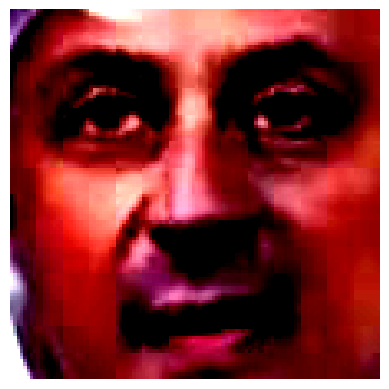

In [32]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random

class video_dataset(Dataset):
    def __init__(self, video_names, labels, sequence_length=60, transform=None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length

        # Ensure labels have correct formatting
        self.labels["file"] = self.labels["file"].str.strip()  # Remove unwanted spaces

    def __len__(self):
        return len(self.video_names)

    def __getitem__(self, idx):
        video_path = self.video_names[idx]
        frames = []
        temp_video = os.path.basename(video_path)  # Extract filename only

        matching_rows = self.labels.loc[self.labels["file"] == temp_video]

        if matching_rows.empty:
            print(f"Warning: No label found for {temp_video}, skipping sample.")
            return None  # Skip this sample

        label = matching_rows.iloc[0, 1]

        label = 0 if label == 'FAKE' else 1  # Convert labels to numeric

        for frame in self.frame_extract(video_path):
            frames.append(self.transform(frame))
            if len(frames) == self.count:
                break

        if len(frames) < self.count:
            print(f"Warning: {temp_video} has fewer frames than {self.count}, skipping.")
            return None  # Skip sample with insufficient frames

        frames = torch.stack(frames)[:self.count]
        return frames, label

    def frame_extract(self, path):
        vidObj = cv2.VideoCapture(path)
        success, image = vidObj.read()
        while success:
            yield cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            success, image = vidObj.read()

# Function to scan the dataset directory and get video file paths
def get_video_files_from_directory(directory):
    video_extensions = [".mp4", ".avi", ".mov", ".mkv"]
    return [os.path.join(directory, f) for f in os.listdir(directory) if os.path.splitext(f)[1].lower() in video_extensions]

# Plot image function
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1, 2, 0)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Function to count real and fake videos
def number_of_real_and_fake_videos(data_list, labels):
    fake, real = 0, 0

    for i in data_list:
        temp_video = os.path.basename(i)  # Extract filename
        matching_rows = labels.loc[labels["file"] == temp_video]

        if matching_rows.empty:
            print(f"Warning: No label found for {temp_video}")  # Debugging output
            continue  # Skip this file

        label = matching_rows.iloc[0, 1]

        if label == 'FAKE':
            fake += 1
        elif label == 'REAL':
            real += 1

    return real, fake

# Load labels
csv_path = r"C:\Users\harsh\Deepfake_detection_using_deep_learning\Face_only_data\metadata.csv"
header_list = ["file", "label"]
labels = pd.read_csv(csv_path, names=header_list)
labels["file"] = labels["file"].str.strip()  # Remove spaces in filenames

# Provide dataset path where videos are stored
dataset_path = r"C:/Users/harsh/Deepfake_detection_using_deep_learning/Face_only_data"
video_files = get_video_files_from_directory(dataset_path)  # Get all video paths

# Split dataset
train_videos = video_files[:int(0.8 * len(video_files))]
valid_videos = video_files[int(0.8 * len(video_files)):]

print("Train videos:", len(train_videos))
print("Test videos:", len(valid_videos))

print("TRAIN: Real:", number_of_real_and_fake_videos(train_videos, labels)[0],
      " Fake:", number_of_real_and_fake_videos(train_videos, labels)[1])

print("TEST: Real:", number_of_real_and_fake_videos(valid_videos, labels)[0],
      " Fake:", number_of_real_and_fake_videos(valid_videos, labels)[1])

# Transformations
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Load dataset
train_data = video_dataset(train_videos, labels, sequence_length=10, transform=train_transforms)
val_data = video_dataset(valid_videos, labels, sequence_length=10, transform=test_transforms)

# Remove None values from dataset
train_data = [sample for sample in train_data if sample is not None]
val_data = [sample for sample in val_data if sample is not None]

train_loader = DataLoader(train_data, batch_size=4, shuffle=True, num_workers=4)
valid_loader = DataLoader(val_data, batch_size=4, shuffle=True, num_workers=4)

# Fetch first sample and plot
image, label = train_data[0]
im_plot(image[0, :, :, :])


In [33]:
import torch
import numpy as np


In [34]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [35]:
# Instantiate the model with your desired number of output classes (e.g., 2)
model = Model(num_classes=2).cuda()  # or .to(device) if using a device variable


C:\Users\harsh\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [36]:
torch.save(model.state_dict(), 'checkpoint.pt')


In [37]:
from IPython.display import FileLink
FileLink('checkpoint.pt')


C:\Users\harsh\ActionDetectionforSignLanguage\checkpoint.pt

In [38]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

C:\Users\harsh\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [39]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(), 'checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1) 
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [40]:
pip install "numpy<2.0"


Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [42]:
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [43]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

[Epoch 1/20] [Batch 20 / 21] [Loss: 0.713272, Acc: 45.68%]Testing
[Batch 4 / 5]  [Loss: 0.694153, Acc: 50.00%]
Accuracy 50.0
[Epoch 2/20] [Batch 20 / 21] [Loss: 0.694878, Acc: 46.91%]Testing
[Batch 4 / 5]  [Loss: 0.689070, Acc: 50.00%]
Accuracy 50.0
[Epoch 3/20] [Batch 20 / 21] [Loss: 0.677326, Acc: 51.85%]Testing
[Batch 4 / 5]  [Loss: 0.689454, Acc: 50.00%]
Accuracy 50.0
[Epoch 4/20] [Batch 20 / 21] [Loss: 0.673263, Acc: 53.09%]Testing
[Batch 4 / 5]  [Loss: 0.678580, Acc: 60.00%]]
Accuracy 60.0
[Epoch 5/20] [Batch 20 / 21] [Loss: 0.659445, Acc: 62.96%]Testing
[Batch 4 / 5]  [Loss: 0.702409, Acc: 40.00%]
Accuracy 40.0
[Epoch 6/20] [Batch 20 / 21] [Loss: 0.629612, Acc: 67.90%]Testing
[Batch 4 / 5]  [Loss: 0.673325, Acc: 60.00%]
Accuracy 60.0
[Epoch 7/20] [Batch 20 / 21] [Loss: 0.596782, Acc: 81.48%]Testing
[Batch 4 / 5]  [Loss: 0.662224, Acc: 60.00%]
Accuracy 60.0
[Epoch 8/20] [Batch 20 / 21] [Loss: 0.536571, Acc: 80.25%]Testing
[Batch 4 / 5]  [Loss: 0.694417, Acc: 60.00%]
Accuracy 60.0

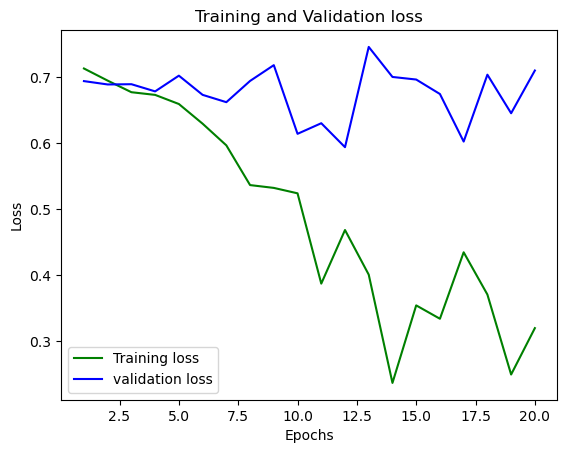

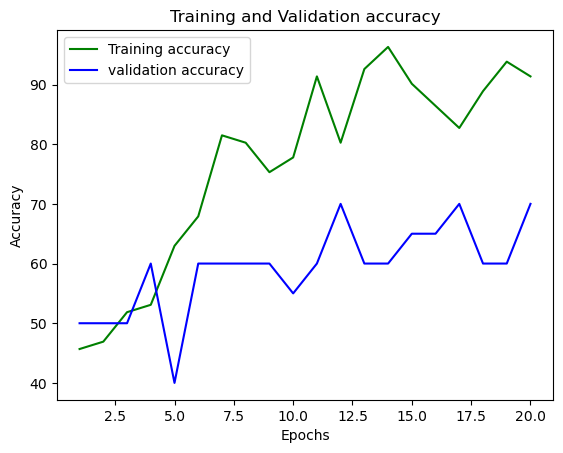

[[10  0]
 [ 6  4]]
True positive =  10
False positive =  0
False negative =  6
True negative =  4




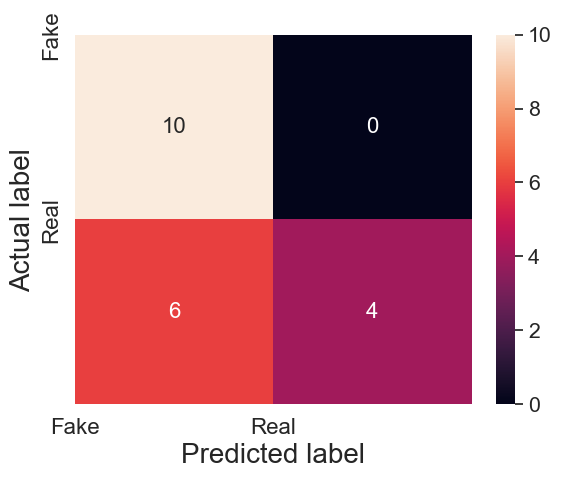

Calculated Accuracy 70.0


In [44]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs 
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)

In [30]:
# import torch
# import torch.nn as nn
# import numpy as np
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Define the print_confusion_matrix function
# def print_confusion_matrix(y_true, y_pred):
#     cm = confusion_matrix(y_true, y_pred)
#     TN, FP, FN, TP = cm.ravel()
#     print("True positive = ", TP)
#     print("False positive = ", FP)
#     print("False negative = ", FN)
#     print("True negative = ", TN)

#     plt.figure(figsize=(6, 4))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
#     plt.xlabel("Predicted label")
#     plt.ylabel("Actual label")
#     plt.title("Confusion Matrix")
#     plt.show()

# # Learning rate and number of epochs
# lr = 1e-5
# num_epochs = 20

# # Define your model before this (make sure it's on CUDA if available)
# # model = YourModel().cuda()

# optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

# # You can use class weights if needed
# # class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
# # criterion = nn.CrossEntropyLoss(weight=class_weights).cuda()

# criterion = nn.CrossEntropyLoss().cuda()

# train_loss_avg = []
# train_accuracy = []
# test_loss_avg = []
# test_accuracy = []

# for epoch in range(1, num_epochs + 1):
#     l, acc = train_epoch(epoch, num_epochs, train_loader, model, criterion, optimizer)
#     train_loss_avg.append(l)
#     train_accuracy.append(acc)

#     true, pred, tl, t_acc = test(epoch, model, valid_loader, criterion)
#     test_loss_avg.append(tl)
#     test_accuracy.append(t_acc)

# # You should define these plot functions too
# plot_loss(train_loss_avg, test_loss_avg, len(train_loss_avg))
# plot_accuracy(train_accuracy, test_accuracy, len(train_accuracy))

# print(confusion_matrix(true, pred))
# print_confusion_matrix(true, pred)


NameError: name 'train_loader' is not defined

In [31]:
# import torch
# from torch.utils.data import DataLoader
# from torchvision import transforms
# import pandas as pd
# import os
# from torch.utils.data import Dataset
# import cv2
# import matplotlib.pyplot as plt

# # Define your dataset class, transformations, and dataset loading code

# # Ensure that train_loader and valid_loader are initialized correctly

# # If the data is filtered, make sure that there is no empty dataset
# train_data = [sample for sample in train_data if sample is not None]
# val_data = [sample for sample in val_data if sample is not None]

# if len(train_data) == 0:
#     raise ValueError("Training data is empty after filtering out None samples")
# if len(val_data) == 0:
#     raise ValueError("Validation data is empty after filtering out None samples")

# # DataLoader initialization
# train_loader = DataLoader(train_data, batch_size=4, shuffle=True, num_workers=4)
# valid_loader = DataLoader(val_data, batch_size=4, shuffle=True, num_workers=4)

# # Test the first batch to verify data shape consistency
# for i, (frames, label) in enumerate(train_loader):
#     print(f"Batch {i}: Frames shape: {frames.shape}, Label shape: {label.shape}")
#     break  # Just to check the first batch

# # Now run the training loop
# lr = 1e-5  # Learning rate
# num_epochs = 20

# # Initialize the model and optimizer (Make sure the model is defined and moved to the device)
# model = Model(num_classes=2).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
# criterion = nn.CrossEntropyLoss().to(device)

# train_loss_avg = []
# train_accuracy = []
# test_loss_avg = []
# test_accuracy = []

# for epoch in range(1, num_epochs + 1):
#     # Train for one epoch
#     l, acc = train_epoch(epoch, num_epochs, train_loader, model, criterion, optimizer)
#     train_loss_avg.append(l)
#     train_accuracy.append(acc)

#     # Test on the validation set
#     true, pred, tl, t_acc = test(epoch, model, valid_loader, criterion)
#     test_loss_avg.append(tl)
#     test_accuracy.append(t_acc)

# # Plotting loss and accuracy
# plot_loss(train_loss_avg, test_loss_avg, len(train_loss_avg))
# plot_accuracy(train_accuracy, test_accuracy, len(train_accuracy))

# # Print confusion matrix
# print(confusion_matrix(true, pred))
# print_confusion_matrix(true, pred)


NameError: name 'train_data' is not defined

In [45]:
#import libraries
!pip3 install face_recognition

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

In [46]:
#import libraries
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
from torch import nn
from torchvision import models

In [47]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True)
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(x_lstm[:,-1,:]))

In [48]:
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
sm = nn.Softmax()
inv_normalize =  transforms.Normalize(mean=-1*np.divide(mean,std),std=np.divide([1,1,1],std))
def im_convert(tensor):
    """ Display a tensor as an image. """
    image = tensor.to("cpu").clone().detach()
    image = image.squeeze()
    image = inv_normalize(image)
    image = image.numpy()
    image = image.transpose(1,2,0)
    image = image.clip(0, 1)
    cv2.imwrite('./2.png',image*255)
    return image

def predict(model,img,path = './'):
  fmap,logits = model(img.to('cuda'))
  params = list(model.parameters())
  weight_softmax = model.linear1.weight.detach().cpu().numpy()
  logits = sm(logits)
  _,prediction = torch.max(logits,1)
  confidence = logits[:,int(prediction.item())].item()*100
  print('confidence of prediction:',logits[:,int(prediction.item())].item()*100)
  idx = np.argmax(logits.detach().cpu().numpy())
  bz, nc, h, w = fmap.shape
  out = np.dot(fmap[-1].detach().cpu().numpy().reshape((nc, h*w)).T,weight_softmax[idx,:].T)
  predict = out.reshape(h,w)
  predict = predict - np.min(predict)
  predict_img = predict / np.max(predict)
  predict_img = np.uint8(255*predict_img)
  out = cv2.resize(predict_img, (im_size,im_size))
  heatmap = cv2.applyColorMap(out, cv2.COLORMAP_JET)
  img = im_convert(img[:,-1,:,:,:])
  result = heatmap * 0.5 + img*0.8*255
  cv2.imwrite('/content/1.png',result)
  result1 = heatmap * 0.5/255 + img*0.8
  r,g,b = cv2.split(result1)
  result1 = cv2.merge((r,g,b))
  plt.imshow(result1)
  plt.show()
  return [int(prediction.item()),confidence]
#img = train_data[100][0].unsqueeze(0)
#predict(model,img)

In [49]:
#!pip3 install face_recognition
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class validation_dataset(Dataset):
    def __init__(self,video_names,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)      
        for i,frame in enumerate(self.frame_extract(video_path)):
            #if(i % a == first_frame):
            faces = face_recognition.face_locations(frame)
            try:
              top,right,bottom,left = faces[0]
              frame = frame[top:bottom,left:right,:]
            except:
              pass
            frames.append(self.transform(frame))
            if(len(frames) == self.count):
              break
        #print("no of frames",len(frames))
        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames.unsqueeze(0)
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

C:\Users\harsh\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\harsh\AppData\Local\Temp\ipykernel_30748\1293841298.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/b

C:\Users\harsh\Downloads\willsmith.mp4


C:\Users\harsh\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1964706182479858].


confidence of prediction: 94.81222033500671


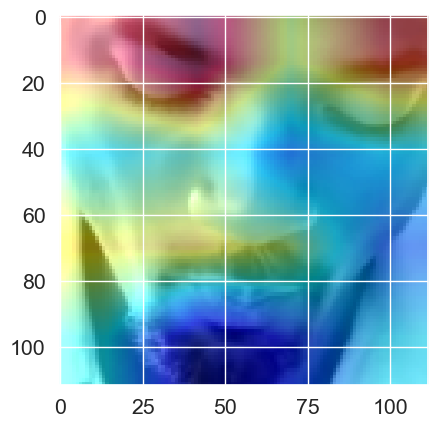

FAKE


In [54]:
#Code for making prediction
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])                

path_to_videos= [r"C:\Users\harsh\Downloads\willsmith.mp4"]

video_dataset = validation_dataset(path_to_videos,sequence_length = 20,transform = train_transforms)
model = Model(2).cuda()
path_to_model = r"C:\Users\harsh\Downloads\checkpoint.pt"
model.load_state_dict(torch.load(path_to_model))
model.eval()
for i in range(0,len(path_to_videos)):
  print(path_to_videos[i])
  prediction = predict(model,video_dataset[i],'./')
  if prediction[0] == 1:
    print("REAL")
  else:
    print("FAKE")